In [16]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/SDN_DDoS_.csv')
data.head(10)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,245230,44,40,124937,1071,9100,0,2839.477273,1839.508257,517,0,26.775000,109.188026,513835.990700,342.535579,2954.578313,7953.221927,64066,-44,238564,5548.000000,10446.29576,64066,2,245230,6287.948718,12986.46879,79070,29,0,0,880,804,179.423398,163.112180,0,9100,1482.447059,1933.268313,3.737526e+06,0,1,0,0,1,0,0,0,0,1500.095238,2839.477273,26.775000,44,124937,40,1071,41,0,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1605449,107,149,1071,439537,517,0,10.009346,67.496680,27300,0,2949.912752,3012.589539,274445.342100,159.456949,6295.878431,56408.330520,859760,-102,1332121,12567.179250,83434.14155,861138,2,1603130,10831.959460,73926.65245,861129,1,0,0,2140,3004,66.648022,92.808928,0,27300,1714.428016,2713.465917,7.362897e+06,0,1,0,0,0,0,0,0,1,1721.125000,10.009346,2949.912752,107,1071,149,439537,4,0,0.0,0.0,0,0,0.0,0.0,0,0,0
2,53078,5,5,66,758,66,0,13.200000,29.516097,638,0,151.600000,276.826299,15524.322690,188.401975,5897.555556,15184.845200,46232,19,50302,12575.500000,22521.87727,46251,67,52962,13240.500000,22052.04405,46258,405,0,0,100,124,94.200987,94.200987,0,638,74.909091,190.807471,3.640749e+04,0,1,0,0,0,0,0,0,1,82.400000,13.200000,151.600000,5,66,5,758,1,0,0.0,0.0,0,0,0.0,0.0,0,0,0
3,6975,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,286.738351,6975.000000,0.000000,6975,6975,0,0.000000,0.00000,0,0,0,0.000000,0.00000,0,0,0,0,20,20,143.369176,143.369176,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0.000000,1,0,1,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0
4,190141,13,16,780,11085,427,0,60.000000,130.042942,2596,0,692.812500,794.157350,62401.060270,152.518394,6790.750000,12933.295910,38521,-54,86882,7240.166667,13050.84163,38805,1,190141,12676.066670,15949.09279,38521,1,0,0,260,344,68.370315,84.148080,0,2596,395.500000,661.691706,4.378359e+05,0,1,0,0,0,0,0,0,1,409.137931,60.000000,692.812500,13,780,16,11085,3,0,0.0,0.0,0,0,0.0,0.0,0,0,0
5,4781,2,1,31,0,31,0,15.500000,21.920310,0,0,0.000000,0.000000,6483.999163,627.483790,2390.500000,1427.648591,3400,1381,1381,1381.000000,0.00000,1381,1381,0,0.000000,0.00000,0,0,0,0,40,20,418.322527,209.161263,0,31,7.750000,15.500000,2.402500e+02,0,0,0,0,1,0,0,0,0,10.333333,15.500000,0.000000,2,31,1,0,1,0,0.0,0.0,0,0,0.0,0.0,0,0,0
6,193869,13,16,780,11085,427,0,60.000000,130.042942,1336,0,692.812500,647.306647,61201.120340,149.585545,6923.892857,13383.262890,43932,-20,81284,6773.666667,11899.54001,38755,2,193869,12924.600000,16437.44606,43932,1,0,0,260,344,67.055589,82.529956,0,1336,395.500000,573.015060,3.283463e+05,0,1,0,0,0,0,0,0,1,409.137931,60.000000,692.812500,13,780,16,11085,3,0,0.0,0.0,0,0,0.0,0.0,0,0,0
7,1536,2,1,31,0,31,0,15.500000,21.920310,0,0,0.000000,0.000000,20182.291670,1953.125000,768.000000,94.752309,835,701,835,835.000000,0.00000,835,835,0,0.000000,0.00000,0,0,0,0,40,20,1302.083333,651.041667,0,31,7.750000,15.500000,2.402500e+02,0,0,0,0,1,0,0,0,0,10.333333,15.500000,0.000000,2,31,1,0,1,0,0.0,0.0,0,0,0.0,0.0,0,0,0
8,80,1,1,0,31,0,0,0.000000,0.000000,31,31,31.000000,0.000000,387500.000000,25000.000000,80.000000,0.000000,80,80,0,0.000000,0.00000,0,0,0,0.000000,0.00000,0,0,0,0,20,2

In [17]:
random_state = np.random.RandomState(42)

In [26]:
X=data.drop("Label",axis=1)
y=data["Label"]

In [27]:
import sklearn
X = sklearn.preprocessing.StandardScaler().fit_transform(X)

In [28]:
# Compute DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [29]:
# Number of clusters in labels, ignoring noise if present.
from sklearn import metrics
labels_true=y
n_clusters_ = 2
n_noise_ = list(labels).count(-1)
 
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
  % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
  % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
  % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 10360
Homogeneity: 0.990
Completeness: 0.149
V-measure: 0.260
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.260
Silhouette Coefficient: 0.575


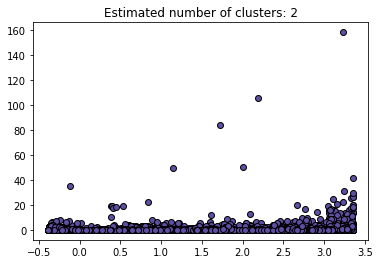

In [30]:
# Plot result
import matplotlib.pyplot as plt
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
      for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
 if k == 1:
    # Black used for noise.
    col = [0, 1]
 
class_member_mask = (labels == k)
 
xy = X[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=14)
 
xy = X[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()